# Preprocessing

In [1]:
!pwd

/e/machine_learning/projects/real_estate_price_prediction/notebooks


## Loading Raw Data

In [2]:
import json
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
data_pth='../data/raw/zillow_ClevelandOH_SOLD.jsonl'

In [4]:
with open(data_pth,'r') as f:
    jsons=[json.loads(line) for line in f.readlines()]

# Formating 

In [5]:
df_raw=pd.DataFrame()
for json_txt in jsons:
    df_raw_json=pd.json_normalize(json_txt)
    df_raw=pd.concat([df_raw,df_raw_json])
    
df_raw=df_raw.drop_duplicates()


In [6]:
df=df_raw.copy()
df.head()

,basic_info.sale_date,basic_info.latitude,basic_info.longitude,basic_info.floorSize,basic_info.url,basic_info.price,facts_and_features.Type:,facts_and_features.Year built:,facts_and_features.Heating:,facts_and_features.Cooling:,facts_and_features.Parking:,facts_and_features.Lot:,additional_features.Interior details.Bedrooms and bathrooms.Bedrooms,additional_features.Interior details.Bedrooms and bathrooms.Bathrooms,additional_features.Interior details.Bedrooms and bathrooms.Full bathrooms,additional_features.Interior details.Bedrooms and bathrooms.Main level bathrooms,additional_features.Interior details.Basement.Has basement,additional_features.Interior details.Basement.Basement,additional_features.Interior details.Heating.Heating features,additional_features.Interior details.Cooling.Cooling features,additional_features.Interior details.Appliances.Appliances included,additional_features.Interior details.Other interior features.Total structure area,additional_features.Interior details.Other interior features.Total interior livable area,additional_features.Interior details.Other interior features.Finished area above ground,additional_features.Interior details.Other interior features.Virtual tour,additional_features.Property details.Parking.Parking features,additional_features.Property details.Parking.Garage spaces,additional_features.Property details.Property.Exterior features,additional_features.Property details.Lot.Lot size,additional_features.Property details.Other property information.Additional parcel(s) included,additional_features.Property details.Other property information.Parcel number,additional_features.Construction details.Type and style.Home type,additional_features.Construction details.Type and style.Architectural style,additional_features.Construction details.Type and style.Property subType,additional_features.Construction details.Material information.Construction materials,additional_features.Construction details.Material information.Roof,additional_features.Construction details.Condition.Year built,additional_features.Utilities / Green Energy Details.Utility.Sewer information,additional_features.Utilities / Green Energy Details.Utility.Water information,additional_features.Community and Neighborhood Details.Location.Region,additional_features.HOA and financial details.HOA.Has HOA fee,additional_features.HOA and financial details.Other financial information.Tax assessed value,additional_features.HOA and financial details.Other financial information.Annual tax amount,additional_features.Other.Other facts.Ownership,additional_features.Interior details.Bedrooms and bathrooms.1/2 bathrooms,additional_features.Property details.Accessibility.Accessibility features,additional_features.Property details.Property.Stories,additional_features.Property details.Property.Patio and porch details,additional_features.Property details.Property.Fencing,additional_features.Property details.Lot.Lot size dimensions,additional_features.Property details.Lot.Lot features,additional_features.Construction details.Other construction.Warranty included,additional_features.Community and Neighborhood Details.Security.Security features,additional_features.Community and Neighborhood Details.Community.Community features,additional_features.Community and Neighborhood Details.Location.Subdivision,additional_features.Other.Other facts.Listing Terms,additional_features.Interior details.Bedroom.Description,additional_features.Interior details.Bedroom.Level,additional_features.Interior details.Bedroom.Dimensions,additional_features.Interior details.Kitchen.Description,additional_features.Interior details.Kitchen.Level,additional_features.Interior details.Kitchen.Dimensions,additional_features.Interior details.Other interior features.Finished area below ground,additional_features.Interior details.Other interior features.Total number of fireplaces,additional_features.Property details.Property.Pool features,additional_features.Interior details.Bathroom.Des

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 0
Data columns (total 448 columns):
 #    Column                                                                                                              Dtype  
---   ------                                                                                                              -----  
 0    basic_info.sale_date                                                                                                object 
 1    basic_info.latitude                                                                                                 float64
 2    basic_info.longitude                                                                                                float64
 3    basic_info.floorSize                                                                                                object 
 4    basic_info.url                                                                                               

# Cleaning Data

## Rename columns

In [8]:
def clean_col(name):
    return name.strip().lower().replace(" ","_").replace(':','')

df=df.rename(columns=clean_col)
df.head()

,basic_info.sale_date,basic_info.latitude,basic_info.longitude,basic_info.floorsize,basic_info.url,basic_info.price,facts_and_features.type,facts_and_features.year_built,facts_and_features.heating,facts_and_features.cooling,facts_and_features.parking,facts_and_features.lot,additional_features.interior_details.bedrooms_and_bathrooms.bedrooms,additional_features.interior_details.bedrooms_and_bathrooms.bathrooms,additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms,additional_features.interior_details.bedrooms_and_bathrooms.main_level_bathrooms,additional_features.interior_details.basement.has_basement,additional_features.interior_details.basement.basement,additional_features.interior_details.heating.heating_features,additional_features.interior_details.cooling.cooling_features,additional_features.interior_details.appliances.appliances_included,additional_features.interior_details.other_interior_features.total_structure_area,additional_features.interior_details.other_interior_features.total_interior_livable_area,additional_features.interior_details.other_interior_features.finished_area_above_ground,additional_features.interior_details.other_interior_features.virtual_tour,additional_features.property_details.parking.parking_features,additional_features.property_details.parking.garage_spaces,additional_features.property_details.property.exterior_features,additional_features.property_details.lot.lot_size,additional_features.property_details.other_property_information.additional_parcel(s)_included,additional_features.property_details.other_property_information.parcel_number,additional_features.construction_details.type_and_style.home_type,additional_features.construction_details.type_and_style.architectural_style,additional_features.construction_details.type_and_style.property_subtype,additional_features.construction_details.material_information.construction_materials,additional_features.construction_details.material_information.roof,additional_features.construction_details.condition.year_built,additional_features.utilities_/_green_energy_details.utility.sewer_information,additional_features.utilities_/_green_energy_details.utility.water_information,additional_features.community_and_neighborhood_details.location.region,additional_features.hoa_and_financial_details.hoa.has_hoa_fee,additional_features.hoa_and_financial_details.other_financial_information.tax_assessed_value,additional_features.hoa_and_financial_details.other_financial_information.annual_tax_amount,additional_features.other.other_facts.ownership,additional_features.interior_details.bedrooms_and_bathrooms.1/2_bathrooms,additional_features.property_details.accessibility.accessibility_features,additional_features.property_details.property.stories,additional_features.property_details.property.patio_and_porch_details,additional_features.property_details.property.fencing,additional_features.property_details.lot.lot_size_dimensions,additional_features.property_details.lot.lot_features,additional_features.construction_details.other_construction.warranty_included,additional_features.community_and_neighborhood_details.security.security_features,additional_features.community_and_neighborhood_details.community.community_features,additional_features.community_and_neighborhood_details.location.subdivision,additional_features.other.other_facts.listing_terms,additional_features.interior_details.bedroom.description,additional_features.interior_details.bedroom.level,additional_features.interior_details.bedroom.dimensions,additional_features.interior_details.kitchen.description,additional_features.interior_details.kitchen.level,additional_features.interior_details.kitchen.dimensions,additional_features.interior_details.other_interior_features.finished_area_below_ground,additional_features.interior_details.other_interior_features.total_number_of_fireplaces,additional_features.property_details.property.pool_features,additional_features.interior_details.bathroom.descripti

## Filter features that are rarely present
When considering dropping a feature we should look at how important the feature is (might require expert advice) and how many values are missing.
In this instance a heuristic will be used: features with more than 30% of values missing will be dropped 

In [9]:
# Inspect which are missing the most
df.isnull().mean().sort_values()

basic_info.sale_date                                                                                                  0.000000
basic_info.latitude                                                                                                   0.000000
basic_info.longitude                                                                                                  0.000000
basic_info.url                                                                                                        0.000000
basic_info.price                                                                                                      0.000000
additional_features.community_and_neighborhood_details.location.region                                                0.000302
facts_and_features.cooling                                                                                            0.000302
facts_and_features.heating                                                                                     

In [10]:
must_have_nonnull_count_thresh=int(0.7*len(df))
df=df.dropna(thresh=must_have_nonnull_count_thresh,axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 0
Data columns (total 30 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   basic_info.sale_date                                                                          3313 non-null   object 
 1   basic_info.latitude                                                                           3313 non-null   float64
 2   basic_info.longitude                                                                          3313 non-null   float64
 3   basic_info.floorsize                                                                          3063 non-null   object 
 4   basic_info.url                                                                                3313 non-null   object 
 5   basic_info.price              

In [11]:
df.head()

,basic_info.sale_date,basic_info.latitude,basic_info.longitude,basic_info.floorsize,basic_info.url,basic_info.price,facts_and_features.type,facts_and_features.year_built,facts_and_features.heating,facts_and_features.cooling,facts_and_features.parking,facts_and_features.lot,additional_features.interior_details.bedrooms_and_bathrooms.bedrooms,additional_features.interior_details.bedrooms_and_bathrooms.bathrooms,additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms,additional_features.interior_details.basement.basement,additional_features.interior_details.heating.heating_features,additional_features.interior_details.cooling.cooling_features,additional_features.interior_details.other_interior_features.total_interior_livable_area,additional_features.property_details.parking.parking_features,additional_features.property_details.property.exterior_features,additional_features.property_details.lot.lot_size,additional_features.property_details.other_property_information.parcel_number,additional_features.construction_details.type_and_style.home_type,additional_features.construction_details.material_information.construction_materials,additional_features.construction_details.material_information.roof,additional_features.construction_details.condition.year_built,additional_features.community_and_neighborhood_details.location.region,additional_features.hoa_and_financial_details.other_financial_information.tax_assessed_value,additional_features.hoa_and_financial_details.other_financial_information.annual_tax_amount
0,Sold 04/14/2021,41.432756,-81.809063,"1,664",https://www.zillow.com/homedetails/4486-W-158th-St-Cleveland-OH-44135/33380420_zpid/,"$140,000",SingleFamily,1952,"Forced Air, Gas",Central Air,"Detached, Garage",0.15 Acres,4,1,1,None,"Forced Air, Gas",Central Air,"1,664 sqft","Detached, Garage",Paved Driveway,0.15 Acres,02828056,SingleFamily,"Brick, Vinyl Siding","Asphalt,Fiberglass",1952,Cleveland,"$66,200","$1,884"
0,Sold 04/14/2021,41.435938,-81.821803,"2,616",https://www.zillow.com/homedetails/4384-Rocky-River-Dr-Cleveland-OH-44135/121949704_zpid/,"$240,000",SingleFamily,1930,"Forced Air, Gas, Heat Pump",Central Air,"Detached, Garage, Parking Lot",0.26 Acres,3,3,2,"Full,Unfinished","Forced Air, Gas, Heat Pump",Central Air,"2,616 sqft","Detached, Garage, Parking Lot","Paved Driveway, Porch, Patio",0.26 Acres,02610010,SingleFamily,Brick,"Asphalt,Fiberglass",1930,Cleveland,"$178,500","$4,989"
0,Sold 04/13/2021,41.444511,-81.809595,"2,384",https://www.zillow.com/homedetails/4048-W-160th-St-Cleveland-OH-44135/33377879_zpid/,"$261,000",SingleFamily,1946,"Forced Air, Gas",Central Air,"Detached, Garage",0.11 Acres,4,4,3,NaN,"Forced Air, Gas",Central Air,"2,384 sqft","Detached, Garage",Paved Driveway,0.11 Acres,02703023,SingleFamily,"Aluminum Siding, Brick","Asphalt,Fiberglass",1946,Cleveland,"$110,300","$3,334"
0,Sold 04/13/2021,41.461457,-81.800982,"1,170",https://www.zillow.com/homedetails/15000-Grapeland-Ave-Cleveland-OH-44111/33372613_zpid/,"$150,000",SingleFamily,1948,"Forced Air, Gas",None,"Detached, Garage",0.10 Acres,3,1,1,"Crawl Space,None","Forced Air, Gas",None,"1,170 sqft","Detached, Garage","Paved Driveway, Porch",0.10 Acres,02422022,SingleFamily,Aluminum Siding,"Asphalt,Fiberglass",1948,Cleveland,"$100,700","$3,044"
0,Sold 04/09/2021,41.436436,-81.788011,"1,422",https://www.zillow.com/homedetails/4331-W-138th-St-Cleveland-OH-44135/33369963_zpid/,"$120,000",SingleFamily,1928,"Forced Air, Gas",Central Air,"Detached, Electricity, Garage",0.11 Acres,3,1,1,"Full,Partially Finished","Forced Air, Gas",Central Air,"1,422 sqft","Detached, Electricity, Garage","Deck, Paved Driveway, Pool, Porch",0.11 Acres,02308100,SingleFamily,Aluminum Siding,"Asphalt,Fiberglass",1928,Cleveland,"$62,300","$1,742"


## Explore features 
Taking a glance at each feature is important for noticing patterns, determining the type of the feature (numerical/categorical), assessing usefulness, trying to understand how the feature was created and which restrictions were or weren't present during input, etc. 

Many of the categorical features do actually contain a list of categories. For example parking_features includes a value like 'Assigned, Electricity, Garage, Garage Door Opener, Heated Garage'. This shows that the input method to this feature either had predifined categories of which a person could select many and/or it had the option to freely add your own description/category. Many of these categories will be dropped if not proved useful enough since its not clear enough, expert advice could be helpful here.

sale_date feature sometimes had invalid data. e.g '12 days on Zillow'

## Drop features not found to be useful

In [12]:
# Most data missing (labeled as 'No Data')
df=df.drop('facts_and_features.heating',axis=1)
df=df.drop('facts_and_features.cooling',axis=1)

# Not that useful, problematic
df=df.drop('facts_and_features.parking',axis=1)
df=df.drop('additional_features.interior_details.basement.basement',axis=1)
df=df.drop('additional_features.property_details.other_property_information.parcel_number', axis=1)
df=df.drop('additional_features.construction_details.material_information.construction_materials',axis=1)
df=df.drop('additional_features.construction_details.material_information.roof', axis=1)
df=df.drop('additional_features.property_details.property.exterior_features',axis=1)


# Already fully/partly expressed in other more useful features
df=df.drop('additional_features.interior_details.heating.heating_features', axis=1)
df=df.drop('additional_features.interior_details.cooling.cooling_features', axis=1)
df=df.drop('additional_features.property_details.parking.parking_features',axis=1)
df=df.drop('facts_and_features.lot', axis=1)
df=df.drop('additional_features.community_and_neighborhood_details.location.region',axis=1)
df=df.drop('additional_features.construction_details.condition.year_built',axis=1)
df=df.drop('additional_features.interior_details.other_interior_features.total_interior_livable_area',axis=1)
df=df.drop('additional_features.construction_details.type_and_style.home_type',axis=1)

# Data Leak
df=df.drop('additional_features.hoa_and_financial_details.other_financial_information.tax_assessed_value',axis=1)
df=df.drop('additional_features.hoa_and_financial_details.other_financial_information.annual_tax_amount',axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 0
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   basic_info.sale_date                                                        3313 non-null   object 
 1   basic_info.latitude                                                         3313 non-null   float64
 2   basic_info.longitude                                                        3313 non-null   float64
 3   basic_info.floorsize                                                        3063 non-null   object 
 4   basic_info.url                                                              3313 non-null   object 
 5   basic_info.price                                                            3313 non-null   object 
 6   facts_and_features.type                            

## Check/fix data types

### basic_info.sale_date
Shows some listings not actually sold, these need to be filtered

In [13]:
df['basic_info.sale_date'].value_counts()[:10]

Sold 02/26/2021    55
Sold 02/11/2021    52
Sold 03/05/2021    43
Sold 03/02/2021    40
Sold 01/15/2021    38
Sold 03/09/2021    38
Sold 02/25/2021    34
Sold 03/01/2021    29
Sold 01/12/2021    29
Sold 01/07/2021    28
Name: basic_info.sale_date, dtype: int64

In [14]:
def clean_date(row):
    # We will still keep it in string format here
    date=row['basic_info.sale_date']
    if date is not None and 'Sold' in date:
        date=date.replace('Sold','').strip()
    else:
        date=None
    row['basic_info.sale_date']=date
    return row

df=df.apply(clean_date,axis=1)
df['basic_info.sale_date']=pd.to_datetime(df['basic_info.sale_date'])
df['basic_info.sale_date'][:3]

0   2021-04-14
0   2021-04-14
0   2021-04-13
Name: basic_info.sale_date, dtype: datetime64[ns]

### basic_info.price

In [15]:
df['basic_info.price'].head()

0    $140,000
0    $240,000
0    $261,000
0    $150,000
0    $120,000
Name: basic_info.price, dtype: object

Inspecting symbols used to identify problematic values

In [16]:
char_set=set([0,1,2,3,4,5,6,7,8,9])
for idx,row in df.iterrows():
    price=row['basic_info.price']
    chars=[char for char in price]
    char_set=char_set.union(set(chars))
    
print(char_set)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, '0', '6', '8', '.', 'M', '5', '3', '$', ',', '4', '1', '9', '2', '7'}


In [17]:
df['basic_info.price'][:3]

0    $140,000
0    $240,000
0    $261,000
Name: basic_info.price, dtype: object

In [18]:
df[df['basic_info.price'].str.contains('M')][:3]['basic_info.price']

0    $1.00M
0    $1.00M
0    $1.11M
Name: basic_info.price, dtype: object

There are a few formatting issues:
- letter 'M' denoting a million
- dollar sign 
- period and commas 
- mixed integer and string types

In [19]:
def clean_price(row):
    # We will still keep it in string format here
    price=row['basic_info.price']
    if 'M' in price:
        price=price.replace('$','').replace('M','')
        price=float(price)*1000000
        price=str(price) 
    elif price is not None:
        price=str(price)
        price=price.replace('$','').replace(',','')
    else:
        price=None
    row['basic_info.price']=price
    return row

df=df.apply(clean_price,axis=1)
df['basic_info.price']=df['basic_info.price'].astype('float64')
df.head()

,basic_info.sale_date,basic_info.latitude,basic_info.longitude,basic_info.floorsize,basic_info.url,basic_info.price,facts_and_features.type,facts_and_features.year_built,additional_features.interior_details.bedrooms_and_bathrooms.bedrooms,additional_features.interior_details.bedrooms_and_bathrooms.bathrooms,additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms,additional_features.property_details.lot.lot_size
0,2021-04-14,41.432756,-81.809063,"1,664",https://www.zillow.com/homedetails/4486-W-158th-St-Cleveland-OH-44135/33380420_zpid/,140000.0,SingleFamily,1952,4,1,1,0.15 Acres
0,2021-04-14,41.435938,-81.821803,"2,616",https://www.zillow.com/homedetails/4384-Rocky-River-Dr-Cleveland-OH-44135/121949704_zpid/,240000.0,SingleFamily,1930,3,3,2,0.26 Acres
0,2021-04-13,41.444511,-81.809595,"2,384",https://www.zillow.com/homedetails/4048-W-160th-St-Cleveland-OH-44135/33377879_zpid/,261000.0,SingleFamily,1946,4,4,3,0.11 Acres
0,2021-04-13,41.461457,-81.800982,"1,170",https://www.zillow.com/homedetails/15000-Grapeland-Ave-Cleveland-OH-44111/33372613_zpid/,150000.0,SingleFamily,1948,3,1,1,0.10 Acres
0,2021-04-09,41.436436,-81.788011,"1,422",https://www.zillow.com/homedetails/4331-W-138th-St-Cleveland-OH-44135/33369963_zpid/,120000.0,SingleFamily,1928,3,1,1,0.11 Acres


### basic_info.floorsize

In [20]:
df['basic_info.floorsize'].head()

0    1,664
0    2,616
0    2,384
0    1,170
0    1,422
Name: basic_info.floorsize, dtype: object

In [21]:
char_set=set([0,1,2,3,4,5,6,7,8,9])
for idx,row in df.iterrows():
    floorsize=str(row['basic_info.floorsize'])
    chars=[char for char in floorsize]
    char_set=char_set.union(set(chars))
    
print(char_set)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, '6', '8', '0', '5', '3', ',', 'e', '4', '1', 'n', '9', '2', 'o', '7', 'N'}


The only odd thing it contains is letters for 'None' and we have to remove commas

In [22]:
def clean_floorsize(row):
    floorsize=row['basic_info.floorsize']
    if floorsize is not None:
        floorsize=str(floorsize)
        floorsize=floorsize.replace(',','')
    else:
        floorsize=None
    row['basic_info.floorsize']=floorsize
    return row

df=df.apply(clean_floorsize,axis=1)
df['basic_info.floorsize']=df['basic_info.floorsize'].apply(pd.to_numeric)
df['basic_info.floorsize']=df['basic_info.floorsize'].round()

In [23]:
df.head()

,basic_info.sale_date,basic_info.latitude,basic_info.longitude,basic_info.floorsize,basic_info.url,basic_info.price,facts_and_features.type,facts_and_features.year_built,additional_features.interior_details.bedrooms_and_bathrooms.bedrooms,additional_features.interior_details.bedrooms_and_bathrooms.bathrooms,additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms,additional_features.property_details.lot.lot_size
0,2021-04-14,41.432756,-81.809063,1664.0,https://www.zillow.com/homedetails/4486-W-158th-St-Cleveland-OH-44135/33380420_zpid/,140000.0,SingleFamily,1952,4,1,1,0.15 Acres
0,2021-04-14,41.435938,-81.821803,2616.0,https://www.zillow.com/homedetails/4384-Rocky-River-Dr-Cleveland-OH-44135/121949704_zpid/,240000.0,SingleFamily,1930,3,3,2,0.26 Acres
0,2021-04-13,41.444511,-81.809595,2384.0,https://www.zillow.com/homedetails/4048-W-160th-St-Cleveland-OH-44135/33377879_zpid/,261000.0,SingleFamily,1946,4,4,3,0.11 Acres
0,2021-04-13,41.461457,-81.800982,1170.0,https://www.zillow.com/homedetails/15000-Grapeland-Ave-Cleveland-OH-44111/33372613_zpid/,150000.0,SingleFamily,1948,3,1,1,0.10 Acres
0,2021-04-09,41.436436,-81.788011,1422.0,https://www.zillow.com/homedetails/4331-W-138th-St-Cleveland-OH-44135/33369963_zpid/,120000.0,SingleFamily,1928,3,1,1,0.11 Acres


### additional_features.property_details.lot.lot_size

In [24]:
df['additional_features.property_details.lot.lot_size'].value_counts(dropna=False)

0.11 Acres     383
NaN            252
0.12 Acres     219
0.10 Acres     215
0.09 Acres     160
0.14 Acres     159
0.13 Acres     159
0.08 Acres     113
0.15 Acres     112
4,791 sqft      77
0.16 Acres      62
0.17 Acres      54
0.07 Acres      40
0.06 Acres      34
5,009 sqft      30
5,619 sqft      30
4,356 sqft      28
6,011 sqft      24
0.05 Acres      24
0.18 Acres      24
0.04 Acres      24
0.20 Acres      22
0.22 Acres      22
4,181 sqft      22
4,617 sqft      21
5,183 sqft      21
3,833 sqft      20
0.19 Acres      18
5,227 sqft      18
0.21 Acres      17
4,007 sqft      17
0.24 Acres      17
4,660 sqft      16
5,662 sqft      16
0.03 Acres      14
6,098 sqft      14
0.23 Acres      13
4,878 sqft      13
3,920 sqft      13
4,800 sqft      13
3,615 sqft      11
5,401 sqft      11
4,399 sqft      11
4,922 sqft       9
5,140 sqft       9
3,484 sqft       9
5,314 sqft       8
4,573 sqft       8
5,000 sqft       8
5,488 sqft       8
4,530 sqft       8
3,005 sqft       8
5,201 sqft  

In [25]:
df['additional_features.property_details.lot.lot_size'].sample(5)

0    7,274 sqft
0    4,399 sqft
0           NaN
0    6,229 sqft
0    4,922 sqft
Name: additional_features.property_details.lot.lot_size, dtype: object

In [26]:
df[df['additional_features.property_details.lot.lot_size']=='NaN']=None

In [27]:
char_set=set([0,1,2,3,4,5,6,7,8,9])
for idx,row in df.iterrows():
    floorsize=str(row['additional_features.property_details.lot.lot_size'])
    chars=[char for char in floorsize]
    char_set=char_set.union(set(chars))
    
print(char_set)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, '6', 'a', '5', '3', ' ', 't', '4', 's', '1', '9', 'n', 'A', 'q', '0', '8', '.', 'e', ',', 'c', 'f', '2', 'r', '7'}


Contains data either in acres or in sqft format. sqft format includes commas while the acres format includes periods

In [28]:
df['additional_features.property_details.lot.lot_size']

0     0.15 Acres
0     0.26 Acres
0     0.11 Acres
0     0.10 Acres
0     0.11 Acres
0     0.15 Acres
0     0.15 Acres
0     0.12 Acres
0     0.16 Acres
0     0.13 Acres
0     0.11 Acres
0     0.15 Acres
0     0.11 Acres
0     4,343 sqft
0     2,592 sqft
0     0.12 Acres
0     0.12 Acres
0            NaN
0     0.14 Acres
0     0.14 Acres
0     3,293 sqft
0            NaN
0     0.10 Acres
0     0.17 Acres
0     0.14 Acres
0     0.15 Acres
0            NaN
0     0.13 Acres
0     0.17 Acres
0     0.17 Acres
0     0.11 Acres
0     0.10 Acres
0     0.17 Acres
0     0.17 Acres
0     0.13 Acres
0     0.15 Acres
0     0.13 Acres
0     0.09 Acres
0     0.15 Acres
0     0.21 Acres
0     0.11 Acres
0     0.15 Acres
0     0.24 Acres
0     0.19 Acres
0     6,011 sqft
0     0.16 Acres
0     0.14 Acres
0     0.12 Acres
0     0.10 Acres
0     0.12 Acres
0     0.14 Acres
0     0.15 Acres
0     0.29 Acres
0     0.11 Acres
0     6,359 sqft
0     0.16 Acres
0     5,619 sqft
0     0.11 Acres
0     0.20 Acr

In [29]:
def clean_lot_size(row):
    lot_size=str(row['additional_features.property_details.lot.lot_size'])

    if lot_size is None:
        lot_size=None
    elif 'Acres' in lot_size:
        lot_size=str(lot_size)
        lot_size=lot_size.replace('Acres','').strip()
        lot_size=float(lot_size)*43560 #converting to sqft
        lot_size=str(lot_size)
    elif 'sqft' in lot_size:
        lot_size=str(lot_size)
        lot_size=lot_size.replace('sqft','').replace(',','').strip()
    row['additional_features.property_details.lot.lot_size']=lot_size
    return row

In [30]:
df=df.apply(clean_lot_size,axis=1)

In [31]:
df['additional_features.property_details.lot.lot_size']=\
df['additional_features.property_details.lot.lot_size'].apply(pd.to_numeric, errors='coerce')

In [32]:
df['additional_features.property_details.lot.lot_size']=\
df['additional_features.property_details.lot.lot_size'].round()

In [33]:
df.head()

,basic_info.sale_date,basic_info.latitude,basic_info.longitude,basic_info.floorsize,basic_info.url,basic_info.price,facts_and_features.type,facts_and_features.year_built,additional_features.interior_details.bedrooms_and_bathrooms.bedrooms,additional_features.interior_details.bedrooms_and_bathrooms.bathrooms,additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms,additional_features.property_details.lot.lot_size
0,2021-04-14,41.432756,-81.809063,1664.0,https://www.zillow.com/homedetails/4486-W-158th-St-Cleveland-OH-44135/33380420_zpid/,140000.0,SingleFamily,1952,4,1,1,6534.0
0,2021-04-14,41.435938,-81.821803,2616.0,https://www.zillow.com/homedetails/4384-Rocky-River-Dr-Cleveland-OH-44135/121949704_zpid/,240000.0,SingleFamily,1930,3,3,2,11326.0
0,2021-04-13,41.444511,-81.809595,2384.0,https://www.zillow.com/homedetails/4048-W-160th-St-Cleveland-OH-44135/33377879_zpid/,261000.0,SingleFamily,1946,4,4,3,4792.0
0,2021-04-13,41.461457,-81.800982,1170.0,https://www.zillow.com/homedetails/15000-Grapeland-Ave-Cleveland-OH-44111/33372613_zpid/,150000.0,SingleFamily,1948,3,1,1,4356.0
0,2021-04-09,41.436436,-81.788011,1422.0,https://www.zillow.com/homedetails/4331-W-138th-St-Cleveland-OH-44135/33369963_zpid/,120000.0,SingleFamily,1928,3,1,1,4792.0


### facts_and_features.type

In [34]:
df['facts_and_features.type'].value_counts(dropna=False) 

SingleFamily    2392
MultiFamily      689
Condo            103
Townhouse         71
VacantLand        34
Apartment         18
Unknown            5
NaN                1
Name: facts_and_features.type, dtype: int64

Looks alright except 'Unknown' value which we will turn to None type

In [35]:
df.loc[(df['facts_and_features.type']=='Unknown'),'facts_and_features.type']=None

### facts_and_features.year_built

In [36]:
df['facts_and_features.year_built'].value_counts(dropna=False).head()

1900       231
1920       224
1910       172
1925       114
No Data    111
Name: facts_and_features.year_built, dtype: int64

Requires turning 'No Data' to None type

In [37]:
df.loc[(df['facts_and_features.year_built']=='No Data'),'facts_and_features.year_built']=None
df['facts_and_features.year_built']=df['facts_and_features.year_built'].apply(pd.to_numeric)

### bedrooms and bathroom columns

In [38]:
df['additional_features.interior_details.bedrooms_and_bathrooms.bedrooms'].value_counts()

3     1486
4      771
2      521
5      141
6      118
8       42
1       41
7       30
9        7
10       5
12       4
0        3
24       1
Name: additional_features.interior_details.bedrooms_and_bathrooms.bedrooms, dtype: int64

In [39]:
df['additional_features.interior_details.bedrooms_and_bathrooms.bathrooms'].value_counts()

2    1387
1    1244
3     350
4      93
0      30
5      11
8       3
6       1
7       1
Name: additional_features.interior_details.bedrooms_and_bathrooms.bathrooms, dtype: int64

In [40]:
df['additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms'].value_counts()

1    1174
2    1016
3     142
4      55
5       3
6       2
7       2
Name: additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms, dtype: int64

In [41]:
df['additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms']=\
df['additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms'].apply(pd.to_numeric)

In [42]:
df['additional_features.interior_details.bedrooms_and_bathrooms.bathrooms']=\
df['additional_features.interior_details.bedrooms_and_bathrooms.bathrooms'].apply(pd.to_numeric)

In [43]:
df['additional_features.interior_details.bedrooms_and_bathrooms.bedrooms']=\
df['additional_features.interior_details.bedrooms_and_bathrooms.bedrooms'].apply(pd.to_numeric)

## Review

In [44]:
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 0
Data columns (total 12 columns):
 #   Column                                                                      Non-Null Count  Dtype         
---  ------                                                                      --------------  -----         
 0   basic_info.sale_date                                                        3271 non-null   datetime64[ns]
 1   basic_info.latitude                                                         3313 non-null   float64       
 2   basic_info.longitude                                                        3313 non-null   float64       
 3   basic_info.floorsize                                                        3063 non-null   float64       
 4   basic_info.url                                                              3313 non-null   object        
 5   basic_info.price                                                            3313 non-null   float64       


<ipython-input-44-6ac79f7ef903>:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  df.info(verbose=True, null_counts=True)


In [45]:
df.describe()

,basic_info.latitude,basic_info.longitude,basic_info.floorsize,basic_info.price,facts_and_features.year_built,additional_features.interior_details.bedrooms_and_bathrooms.bedrooms,additional_features.interior_details.bedrooms_and_bathrooms.bathrooms,additional_features.interior_details.bedrooms_and_bathrooms.full_bathrooms,additional_features.property_details.lot.lot_size
count,3313.000000,3313.000000,3063.000000,3.313000e+03,3189.000000,3170.000000,3120.000000,2394.000000,3.061000e+03
mean,41.466305,-81.703747,1707.954620,1.203264e+05,1933.476325,3.397161,1.773077,1.626149,7.048328e+03
std,0.034141,0.089199,927.760393,3.987480e+05,28.961833,1.305494,0.834749,0.739999,4.506795e+04
min,41.418556,-81.840581,10.000000,1.250000e+02,1810.000000,0.000000,0.000000,1.000000,1.100000e+01
25%,41.441190,-81.787433,1174.000000,4.300000e+04,1915.000000,3.000000,1.000000,1.000000,4.356000e+03
50%,41.458147,-81.702997,1540.000000,8.100000e+04,1927.000000,3.000000,2.000000,2.000000,4.792000e+03
75%,41.479430,-81.614048,2033.500000,1.360000e+05,1950.000000,4.000000,2.000000,2.000000,6.098000e+03
max,41.590965,-81.538300,30150.000000,1.540000e+07,2021.000000,24.000000,8.000000,7.000000,1.899216e+06


## Column Renaming

In [46]:
df.columns=[
    'sale_date',
    'lat',
    'lng',
    'floorsize_sqft',
    'url',
    'price',
    'type',
    'year_built',
    'bedroom_cnt',
    'total_bathroom_cnt',
    'full_bathroom_cnt',
    'lot_size_sqft',
]

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 0
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   sale_date           3271 non-null   datetime64[ns]
 1   lat                 3313 non-null   float64       
 2   lng                 3313 non-null   float64       
 3   floorsize_sqft      3063 non-null   float64       
 4   url                 3313 non-null   object        
 5   price               3313 non-null   float64       
 6   type                3307 non-null   object        
 7   year_built          3189 non-null   float64       
 8   bedroom_cnt         3170 non-null   float64       
 9   total_bathroom_cnt  3120 non-null   float64       
 10  full_bathroom_cnt   2394 non-null   float64       
 11  lot_size_sqft       3061 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 336.5+ KB


## Re-expressing some columns

- There is a full bathroom count feature as well as the overall bathroom count feature, 
we will express it in full bathroom and non full bathroom count features
- We will do the same logic with parking spaces and parking garage spaces

In [48]:
df['partial_bathroom_cnt']=df['total_bathroom_cnt']-df['full_bathroom_cnt']

df=df.drop(columns=[
    'total_bathroom_cnt'
],axis=1)

In [49]:
df.describe()

,lat,lng,floorsize_sqft,price,year_built,bedroom_cnt,full_bathroom_cnt,lot_size_sqft,partial_bathroom_cnt
count,3313.000000,3313.000000,3063.000000,3.313000e+03,3189.000000,3170.000000,2394.000000,3.061000e+03,2393.000000
mean,41.466305,-81.703747,1707.954620,1.203264e+05,1933.476325,3.397161,1.626149,7.048328e+03,0.264939
std,0.034141,0.089199,927.760393,3.987480e+05,28.961833,1.305494,0.739999,4.506795e+04,0.467161
min,41.418556,-81.840581,10.000000,1.250000e+02,1810.000000,0.000000,1.000000,1.100000e+01,0.000000
25%,41.441190,-81.787433,1174.000000,4.300000e+04,1915.000000,3.000000,1.000000,4.356000e+03,0.000000
50%,41.458147,-81.702997,1540.000000,8.100000e+04,1927.000000,3.000000,2.000000,4.792000e+03,0.000000
75%,41.479430,-81.614048,2033.500000,1.360000e+05,1950.000000,4.000000,2.000000,6.098000e+03,1.000000
max,41.590965,-81.538300,30150.000000,1.540000e+07,2021.000000,24.000000,7.000000,1.899216e+06,2.000000


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3313 entries, 0 to 0
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   sale_date             3271 non-null   datetime64[ns]
 1   lat                   3313 non-null   float64       
 2   lng                   3313 non-null   float64       
 3   floorsize_sqft        3063 non-null   float64       
 4   url                   3313 non-null   object        
 5   price                 3313 non-null   float64       
 6   type                  3307 non-null   object        
 7   year_built            3189 non-null   float64       
 8   bedroom_cnt           3170 non-null   float64       
 9   full_bathroom_cnt     2394 non-null   float64       
 10  lot_size_sqft         3061 non-null   float64       
 11  partial_bathroom_cnt  2393 non-null   float64       
dtypes: datetime64[ns](1), float64(9), object(2)
memory usage: 336.5+ KB


## Visualizing numerical features

In [51]:
import matplotlib.pyplot as plt

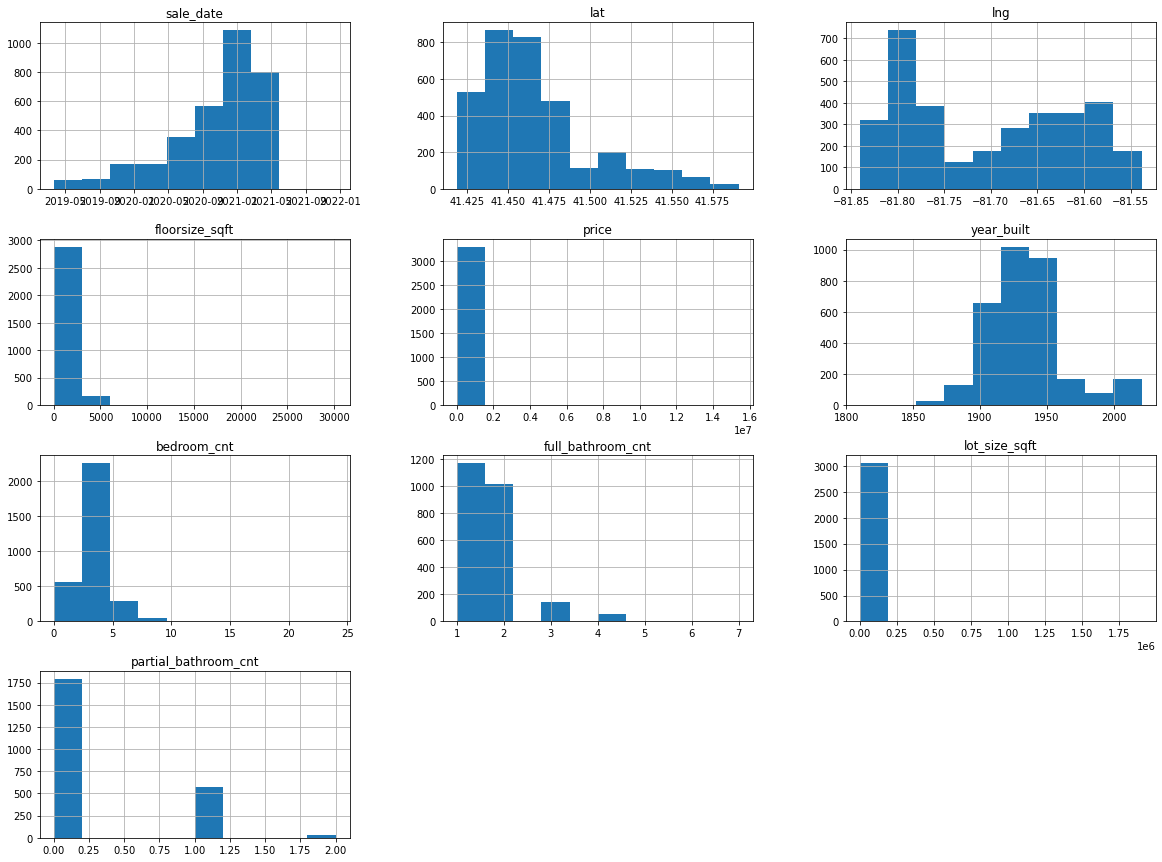

In [52]:
df.hist(bins=10,figsize=(20,15))
plt.show()

## Exporting

In [53]:
df.to_pickle('../data/intermediate/zillow_Cleveland.pkl')